In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir='.', untar= True)

228813984/228813984 [==============================] - 22s 0us/step


In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

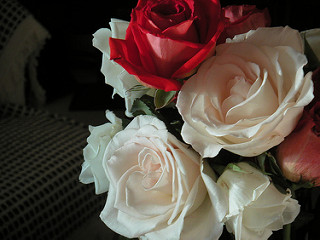

In [13]:
PIL.Image.open(str(roses[1]))

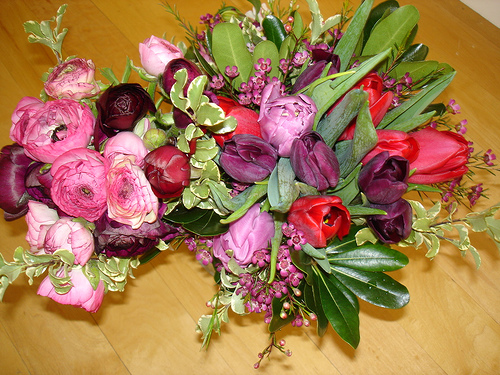

In [34]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[10]))

In [36]:
flower_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [37]:
flower_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [31]:
str(flower_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [32]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [38]:
X, y =[], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [39]:
X = np.array(X)
y = np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
model = Sequential([
    # cnn layer
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),

    # deep network
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)


Epoch 1/10
86/86 [==============================] - 76s 838ms/step - loss: 1.3607 - accuracy: 0.4037
Epoch 2/10
86/86 [==============================] - 61s 704ms/step - loss: 1.0016 - accuracy: 0.6061
Epoch 3/10
86/86 [==============================] - 66s 764ms/step - loss: 0.8241 - accuracy: 0.6890
Epoch 4/10
86/86 [==============================] - 81s 940ms/step - loss: 0.6290 - accuracy: 0.7656
Epoch 5/10
86/86 [==============================] - 68s 792ms/step - loss: 0.3957 - accuracy: 0.8605
Epoch 6/10
86/86 [==============================] - 71s 827ms/step - loss: 0.2187 - accuracy: 0.9244
Epoch 7/10
86/86 [==============================] - 76s 887ms/step - loss: 0.1198 - accuracy: 0.9629
Epoch 8/10
86/86 [==============================] - 74s 858ms/step - loss: 0.0760 - accuracy: 0.9775
Epoch 9/10
86/86 [==============================] - 79s 925ms/step - loss: 0.0461 - accuracy: 0.9873
Epoch 10/10
86/86 [==============================] - 83s 962ms/step - loss: 0.0259 - accura

In [46]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 11s 173ms/step - loss: 2.0188 - accuracy: 0.6514


[2.0188097953796387, 0.6514161229133606]